## ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?
En el desarrollo de este caso introduciremos las librerías pandas, numpy y matplotlib para el preprocesamiento, visualización de un conjunto de datos y el desarrollo de algunas medidas estadísticas descriptivas.



##  Introducción 

La revisión del comportamiento de los clientes en cualquier empresa es de vital importancia para el desarrollo de estrategias  tanto de mejoramiento de productos como de publicidad y toma de decisiones. Evaluaremos la información obtenida de un conjunto de registro obtenidos de una empresa de telecomunicaciones que cuenta con la revisión de las siguientes variables:

1. totrev: Ingresos del cliente
2. totmou: Total de minutos usados por el cliente
3. area: Área geográfica
4. creditcd: Indicador de tarjeta de crédito
5. eqpdays: Número de días (antigüedad) del equipo actual

Es importante mencionar que la empresa contiene una gran cantidad de clientes y hacer el análisis uno a uno no es lo  óptimo. Con ayuda de la programación y el análisis de datos, se logrará llegar a conclusiones rápidas y acertadas para encontrar relaciones que a simple vista no son tenidas en cuenta.

### ¿Qué se quiere identificar? 

Teniendo en cuenta la información de la base de datos se quiere identificar si hay una relación entre el total de minutos usados por el cliente con la compañía y el ingreso total de los clientes, es decir, Será posible afirmar que cuando una persona
tiene un mayor ingreso mayor entonces es mayor la utilización de minutos o todo lo contrario?


####  Insumos para tratar este problema


Teniendo en cuenta que la compañía tenia estándares para la entrega de la información, se dispone de un  conjunto de tablas en formato CSV ordenado de la siguiente manera:
La información de este conjunto de datos puede encontrase en [aquí](https://www.kaggle.com/abhinav89/telecom-customer?select=Telecom_customer+churn.csv)

### Objetivos

En este caso usted tendrá que cargar varias bases de datos, hará una exploración básica sobre la información y fusionará las distintas bases para tener una visión general del problema. La idea es que desarrolle las siguientes habilidades:

1. Manejo de la librería pandas de Python para cargar y leer datos; 
2. Ideas elementales para una útil transformación de los datos;
3. Construcción y presentación de argumentos válidos que le brindarán una solución para la pregunta expresada más arriba y llegar a una conclusión. 
4. Visualización de gráficas elementales que le permitirá entender mejor la información contenida en los datos.

#### Importación de paquetes


Una de las mejores opciones para trabajar con datos tabulares en Python es usar el módulo pandas. La librería `pandas` provee estructuras de datos, genera gráficos de alta calidad con `matplotlib` y se integra de buena forma con otras librerías que usan arrays de `numpy`.

Debemos revisar si la librería se encuentra en nuestro sistema usando el comando 

```python
!pip show librería
```


In [3]:
#!pip show pandas
#!pip show numpy
#!pip show matplotlib

En el caso de que la librería no se encuentre instalada ejecutamos el comando

```python
!pip install librería
```

Para importar las librerías usamos el comando 
```python
import librería as alias
```

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Luego de que tener los paquetes activados dentro de nuestro ambiente de python podremos usar las fucnciones que se encuentren en la librería.

### Introducción a pandas

Poner información sobre pandas e indicar la diferencia entre series y dataframe

![](https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

A continuación, mostramos el código a ejecutar para crear una ` Serie`

In [5]:
Serie1 = pd.Series(
index=['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto'], name="Variable1", data=["A","B","C","D","E"]
)
Serie1 

Primero    A
Segundo    B
Tercero    C
Cuarto     D
Quinto     E
Name: Variable1, dtype: object

In [6]:
Data_Frame = pd.DataFrame( 
index=['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto'],
    columns=["Variable2","Variable3"], 
    data=[['Hola', 12], [2, 22],[3,32],[4,42],[5,52]]
)
Data_Frame

,Variable2,Variable3
Primero,Hola,12
Segundo,2,22
Tercero,3,32
Cuarto,4,42
Quinto,5,52


Para revisar el tipo de objeto que contiene nuestro DataFrame podemos ejecutar

In [7]:
Data_Frame.dtypes
Serie1.dtypes

dtype('O')

In [8]:
Data_Frame

,Variable2,Variable3
Primero,Hola,12
Segundo,2,22
Tercero,3,32
Cuarto,4,42
Quinto,5,52


In [9]:
Data_Frame['Variable3'] = Data_Frame['Variable3'].astype('float')

Extraer datos sobre la base:

Si quiero conocer una columna de la base simplemente escribo `DataFrame['nombre_columna']`

In [10]:
Data_Frame[['Variable2']]

,Variable2
Primero,Hola
Segundo,2
Tercero,3
Cuarto,4
Quinto,5


In [11]:
Data_Frame['Variable1']=Serie1

In [12]:
Data_Frame

,Variable2,Variable3,Variable1
Primero,Hola,12.0,A
Segundo,2,22.0,B
Tercero,3,32.0,C
Cuarto,4,42.0,D
Quinto,5,52.0,E


Si quiero ver varias columnas de la base de datos, utilizo doble paréntesis cuadrado:

`DataFrame[['columna1','columna2']]`

In [13]:
Data_Frame[['Variable1','Variable2']]

,Variable1,Variable2
Primero,A,Hola
Segundo,B,2
Tercero,C,3
Cuarto,D,4
Quinto,E,5


Si quiero ver datos por registros utilizo loc:

In [14]:
Data_Frame.loc[['Primero','Tercero','Quinto']]

,Variable2,Variable3,Variable1
Primero,Hola,12.0,A
Tercero,3,32.0,C
Quinto,5,52.0,E


In [15]:
Data_Frame.iloc[4]

Variable2       5
Variable3    52.0
Variable1       E
Name: Quinto, dtype: object

### Carga de información en `pandas`

Para nuestro  ejercicio usaremos los siguientes conjuntos de datos:

1. NEW ENGLAND AREA.csv
2. ATLANTIC SOUTH AREA.csv
3. NEW YORK CITY AREA.csv
4. CHICAGO AREA.csv
5. NORTH FLORIDA AREA.csv
6. DC-MARYLAND-VIRGINIA AREA.csv
7. GREAT LAKES AREA.csv
8. NORTHWEST-ROCKY MOUNTAIN AREA.csv
9. MIDWEST AREA.csv
10. SOUTHWEST AREA.csv
11. LOS ANGELES AREA.csv
12. HOUSTON AREA.csv
13. CALIFORNIA NORTH AREA.csv
14. CENTRAL-SOUTH TEXAS AREA.csv
15. DALLAS AREA.csv
16. PHILADELPHIA AREA.csv
17. TENNESSEE AREA.csv
18. OHIO AREA.csv
19. SOUTH FLORIDA AREA.csv

Cada uno de estos conjuntos de datos contiene la información de:

1. *mou_Mean:* Número medio de minutos de uso mensuales
2. *custcare_Mean:* Número medio de llamadas de atención al cliente
3. *area:*  Área geografica
4. *creditcd:* Indicador de tarjeta de crédito
5. *eqpdays:* Número de días (antigüedad) del equipo actual

Además, se incluye _Credito_dias.csv_ con la información de 2 variables adicionales para los registros las cuales son:

1. _creditcd:_ Indicador de tarjeta de crédito
2. _eqpdays:_ Número de días (antigüedad) del equipo actual

Revisaremos inicialmente los datos contenidos en _Credito_dias.csv_ para revisar algunas funciones interesantes de `pandas`, usaremos el comando 
```python
pd.read_csv("archivo.csv")
```
Podemos definir el número de registros a imprimir usando
```python
pd.options.display.min_rows=10
````

In [16]:
df=pd.read_csv("../Datos/Clase 2/Credito_dias.csv", sep=",",index_col="Customer_ID")
df

,totmou,totrev,creditcd,eqpdays
Customer_ID,,,,
1082423,7269.0,906.58,Y,371
1069232,13552.0,1172.25,N,83
1031705,4152.0,577.39,Y,675
1089806,1863.0,294.26,Y,218
1076695,4155.0,433.16,N,222
...,...,...,...,...
1027614,2570.0,484.31,Y,611
1098422,2105.0,583.36,Y,1243
1096497,3690.0,294.29,Y,212


In [17]:
#Tabla de frecuencias

df['creditcd'].value_counts(dropna=False)

creditcd
Y      6796
N      3052
NaN     152
Name: count, dtype: int64

In [18]:
#Tabla de frecuencias relativa
df['creditcd'].value_counts(normalize=True, dropna=False)

creditcd
Y      0.6796
N      0.3052
NaN    0.0152
Name: proportion, dtype: float64

<Axes: xlabel='creditcd'>

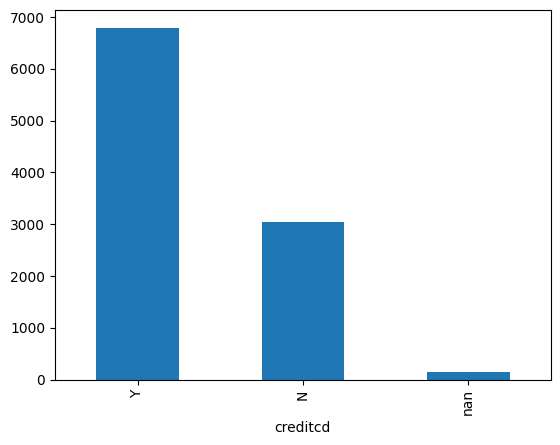

In [19]:
#Gráfico de barras con frecuencias absolutas
df['creditcd'].value_counts(dropna=False).plot(kind = 'bar')

<Axes: ylabel='proportion'>

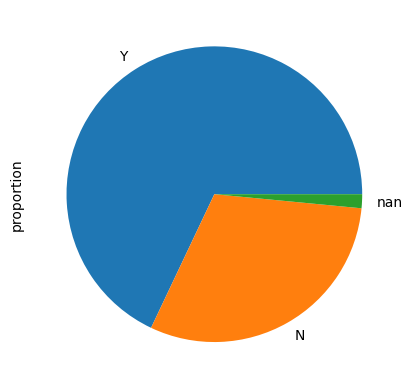

In [20]:
#Gráfico de barras con frecuencias absolutas
df['creditcd'].value_counts(normalize=True, dropna=False).plot(kind = 'pie')

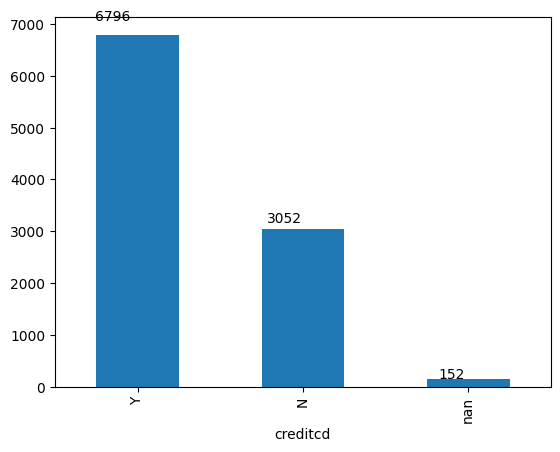

In [21]:
# Crear el gráfico de barras
ax = df['creditcd'].value_counts(dropna=False).plot(kind='bar')

# Añadir etiquetas de valor encima de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.04, p.get_height() * 1.04))

# Mostrar el gráfico
plt.show()

In [22]:
df['totmou'].mean()

np.float64(7692.8048656727005)

In [23]:
df['totmou'].median()

np.float64(5262.0)

In [24]:
df['totmou'].value_counts()

totmou
6891.0    6
1581.0    6
1710.0    6
4106.0    6
1193.0    5
         ..
4898.0    1
3850.0    1
4281.0    1
6473.0    1
2812.0    1
Name: count, Length: 7433, dtype: int64

### DISPERSIÓN

In [25]:
## Rango
df['totmou'].max() - df['totmou'].min()

np.float64(163264.1767)

In [26]:
## Medidas de posición (cuantiles)

### Son los valores que dividen a un conjunto de datos ordenados en partes, según la proporción de datos que se quiere obtener

## Percentiles

for percentil in np.arange(0, 1.1, 0.1):
    print(f"Percentil{percentil*100}:{df['totmou'].quantile(percentil)}")


Percentil0.0:0.0
Percentil10.0:1157.9
Percentil20.0:2116.8
Percentil30.000000000000004:3040.7000000000003
Percentil40.0:4056.0
Percentil50.0:5262.0
Percentil60.00000000000001:6682.800000000004
Percentil70.0:8630.3
Percentil80.0:11295.800000000007
Percentil90.0:16654.1
Percentil100.0:163264.1767


<Axes: >

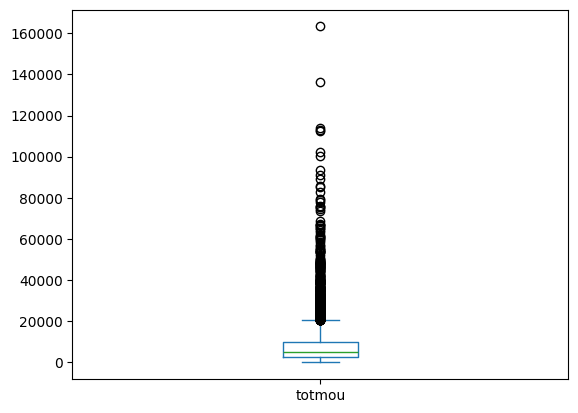

In [27]:
df['totmou'].plot(kind = "box")

In [28]:
IQR = df['totmou'].quantile(0.75)-df['totmou'].quantile(0.25)

print(IQR)

7247.25


In [29]:
df['totmou'].std()

np.float64(8657.917883024007)

In [30]:
df['totmou'].var()

np.float64(74959542.0691869)

In [31]:
df['totmou'].describe()

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

In [32]:
df['totmou'].describe(percentiles=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7))

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
10%        1157.900000
20%        2116.800000
30%        3040.700000
40%        4056.000000
50%        5262.000000
60%        6682.800000
70%        8630.300000
max      163264.176700
Name: totmou, dtype: float64

<Axes: ylabel='Frequency'>

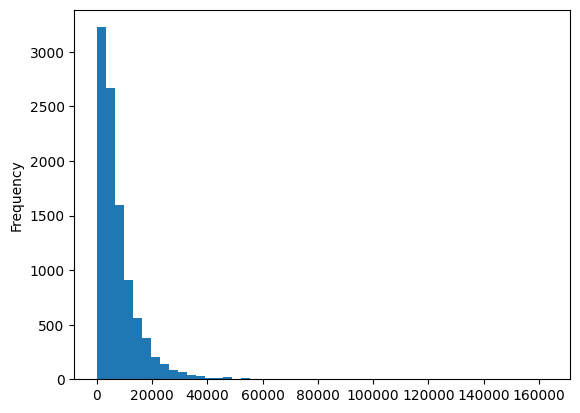

In [33]:
df['totmou'].plot(kind = "hist", bins = 50)

In [34]:
### Asimetría


print(df['totmou'].skew())

### curtosis

print(df['totmou'].kurt())

4.326137332645958
37.279895941232276


### Análisis de variables categoricas

Creamos una variable nueva que particione el grpo en 3 categorías según su consumo de minutos, para ello usamos la desviación estándar

In [35]:

def particion(x):
    media = df['totmou'].mean()
    devest = df['totmou'].std()

    if x<media-0.5*devest:
        return "Alto"
    elif x>media+0.5*devest:
        return "Bajo"
    else:
        return "Medio"
    

df['consumo'] = df['totmou'].apply(particion)

In [36]:
df['consumo'].value_counts(dropna=False)

consumo
Medio    4862
Alto     3325
Bajo     1813
Name: count, dtype: int64

In [37]:
## Tabla de frecuencias conjuntas y marginales


### creditcd y consumo


tabla = pd.crosstab(df['creditcd'],df['consumo'], margins = True)

tabla

consumo,Alto,Bajo,Medio,All
creditcd,,,,
N,872,626,1554,3052
Y,2397,1161,3238,6796
All,3269,1787,4792,9848


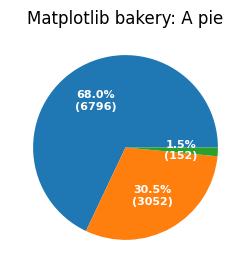

In [38]:
## Gráfico de anillos anidados para las variables creditcd y consumo


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

data_pie=df['creditcd'].value_counts(dropna=False)

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"
wedges, texts, autotexts = ax.pie(data_pie, autopct=lambda pct: func(pct, data_pie),
                                  textprops=dict(color="w"))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()


## Variable categórica vs numérica

<Axes: title={'center': 'totmou'}, xlabel='creditcd'>

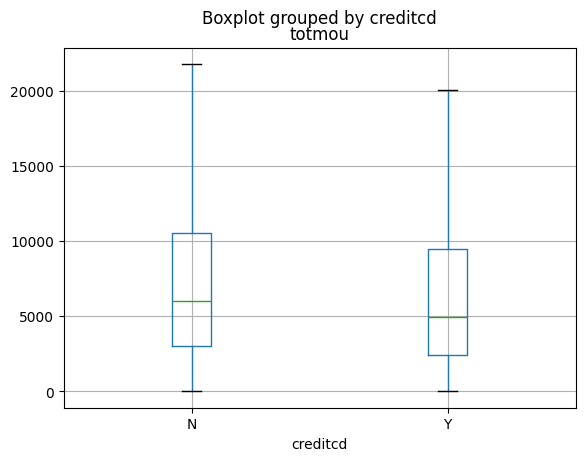

In [39]:
## Creamos un boxplot para la varible totmou , segmentando por la variable credictd

df.boxplot(column= 'totmou', by =  'creditcd', showfliers = False)

<Axes: title={'center': 'totmou'}, xlabel='creditcd'>

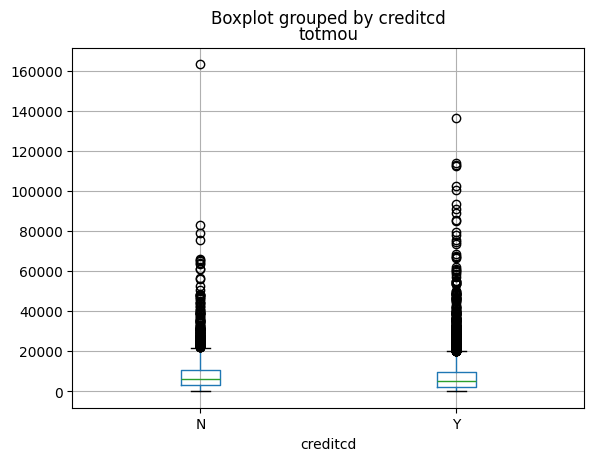

In [40]:
## Creamos un boxplot para la varible totmou , segmentando por la variable credictd

df.boxplot(column= 'totmou', by =  'creditcd')

In [41]:
df.groupby('creditcd')['totmou'].mean()

creditcd
N    8288.588805
Y    7432.629588
Name: totmou, dtype: float64

In [42]:
df.groupby('creditcd').agg({'totmou':['mean', 'std', 'median', 'min', 'max']})

totmou                                        
                 mean          std  median   min          max
creditcd                                                     
N         8288.588805  8620.154772  6021.5  12.0  163264.1767
Y         7432.629588  8668.288580  4964.5   0.0  136445.0000

In [43]:
df.groupby('creditcd').agg({'totmou':['mean', 'std', 'median', 'min', 'max'],
                           'totrev': ['mean', 'std', 'median', 'min', 'max']})

totmou                                               totrev  \
                 mean          std  median   min          max         mean   
creditcd                                                                     
N         8288.588805  8620.154772  6021.5  12.0  163264.1767  1035.948303   
Y         7432.629588  8668.288580  4964.5   0.0  136445.0000  1045.155534   

                                               
                 std  median    min       max  
creditcd                                       
N         876.743656  806.72  37.39  12583.69  
Y         849.418662  827.50  11.10  13426.60

<Axes: xlabel='totmou', ylabel='totrev'>

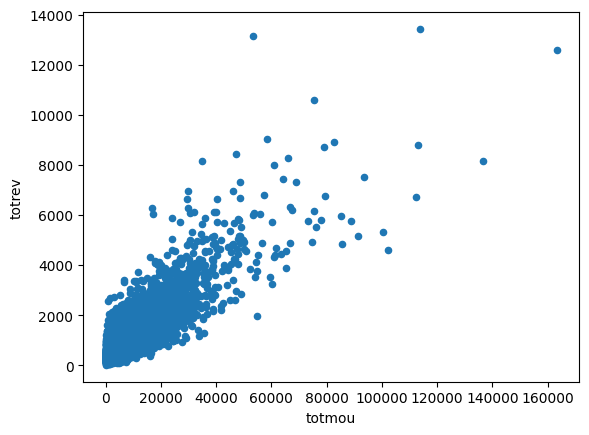

In [44]:
df.plot(kind = 'scatter', x = "totmou", y = "totrev")

In [45]:
df[['totmou', 'totrev']].corr()

,totmou,totrev
totmou,1.000000,0.835485
totrev,0.835485,1.000000


El conjunto de datos se encuentra en el `DataFrame` `df`

sobre el objeto creado podemos usar  algunas funciones  para darnos una idea del comportamiento de la información:
```python
df.head(n)  # imprime los primeros n registros del DataFrame
df.tail(n)  # imprime los últimos n registros del DataFrame 
df.shape    # imprime el numero de columnas y filas del DataFrame
df.columns  # imprime el nombre de las columnas del DataFrame
df.index    # imprime el indice de los registros del DataFrame
df.dtypes   # imprime el tipo de cada una de las columnnas del DataFrame
df.sample(n)# imprime una muestra aleatoria de n registros en el DataFrame
```

In [46]:
display("primeros 3 registros",df.head(3))
display("3 últimos registros",df.tail(3))
display("Columnas:",df.columns)
display("Índices:",df.index)
display("Tipos de registros en el DataFrame",df.dtypes)
display("Muestra aleatoria de 3 registros",df.sample(3))
display("dimensión",df.shape)

'primeros 3 registros'

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1082423,7269.0,906.58,Y,371,Medio
1069232,13552.0,1172.25,N,83,Bajo
1031705,4152.0,577.39,Y,675,Medio


'3 últimos registros'

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1096497,3690.0,294.29,Y,212,Medio
1087248,3333.0,233.08,Y,290,Alto
1099003,5025.0,1436.49,Y,1029,Medio


'Columnas:'

Index(['totmou', 'totrev', 'creditcd', 'eqpdays', 'consumo'], dtype='object')

'Índices:'

Index([1082423, 1069232, 1031705, 1089806, 1076695, 1091652, 1043846, 1088967,
       1045239, 1046584,
       ...
       1087145, 1002540, 1044082, 1083458, 1093976, 1027614, 1098422, 1096497,
       1087248, 1099003],
      dtype='int64', name='Customer_ID', length=10000)

'Tipos de registros en el DataFrame'

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
consumo      object
dtype: object

'Muestra aleatoria de 3 registros'

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1070273,13178.0,730.49,Y,318,Bajo
1024214,11186.0,1025.30,Y,685,Medio
1099347,13454.0,1476.54,N,804,Bajo


'dimensión'

(10000, 5)

Este conjunto de datos corresponde a 10000 registros y 2 variables

### Manejo de datos duplicados 

Los dataframes tienen la posibilidad de detectar las filas duplicadas con la función: 
```
df.duplicated({columns})
```
Si no especifica {columns}, se busacarán duplicados teniendo en cuenta todas las columnas. Una vez detectados el dtaframe tiene un función para eliminar filas duplicadas, haciendo:

```
df = df.drop_duplicates()
```
También es posible eliminar filas que duplican solo algunos campos. Con el fin de dejar solo una ocurrencia.

```
df.drop_duplicates(['nombre', 'apellido', 'cédula'], keep='last')
```
En este caso, como no todas las colomnas son iguales se conserva solo la última ocurrencia.

### Manejo de datos perdidos o esperados
Son aquellos datos flatantes en la tabla que por alguna razón o error no se encuentran, o parecen con algún valor o etiqueta de no válido. 
Para manipular datos perdidos use la explicación dada el siguiente enlace: [DATOS PERDIDOS](http://ligdigonzalez.com/manipulando-datos-perdidos-en-python/)
recuerde que para reemplazar datos perdidos en un dataframe $df$ se usa la función:
```python
promedio = df['totrev'].mean()
df['nota'].replace(np.nan, promedio)
```
en donde la opción 'promedio' busca el valor promedio de la columna (datos numéricos) o la moda (datos categóricos) para reemplazar el valor no válido.


In [47]:
df.isnull().any(axis=0)

totmou      False
totrev      False
creditcd     True
eqpdays     False
consumo     False
dtype: bool

In [48]:
perd=df.isnull().any(axis=1)

In [49]:
df[perd]

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1072218,5684.0,857.65,NaN,244,Medio
1066597,925.0,373.12,NaN,344,Alto
1023352,14466.0,2243.76,NaN,387,Bajo
1045521,2504.0,756.79,NaN,495,Alto
1001813,76260.0,5526.11,NaN,361,Bajo
...,...,...,...,...,...
1050795,15591.0,1330.71,NaN,447,Bajo
1096985,3011.0,522.14,NaN,74,Alto
1025203,853.0,650.34,NaN,780,Alto


In [50]:
perdidos = df[df.isnull().any(axis=1)]
perdidos

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1072218,5684.0,857.65,NaN,244,Medio
1066597,925.0,373.12,NaN,344,Alto
1023352,14466.0,2243.76,NaN,387,Bajo
1045521,2504.0,756.79,NaN,495,Alto
1001813,76260.0,5526.11,NaN,361,Bajo
...,...,...,...,...,...
1050795,15591.0,1330.71,NaN,447,Bajo
1096985,3011.0,522.14,NaN,74,Alto
1025203,853.0,650.34,NaN,780,Alto


In [51]:
df['totrev']

Customer_ID
1082423     906.58
1069232    1172.25
1031705     577.39
1089806     294.26
1076695     433.16
            ...   
1027614     484.31
1098422     583.36
1096497     294.29
1087248     233.08
1099003    1436.49
Name: totrev, Length: 10000, dtype: float64

In [52]:
promedio = df['totrev'].mean()
df['totrev']=df['totrev'].replace(np.nan, promedio)

También es recomendado usar la funcion `fillna()`

In [53]:
df['creditcd'].fillna("Y",inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15264\2197268493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['creditcd'].fillna("Y",inplace=True)


In [54]:
df[perd]

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1072218,5684.0,857.65,Y,244,Medio
1066597,925.0,373.12,Y,344,Alto
1023352,14466.0,2243.76,Y,387,Bajo
1045521,2504.0,756.79,Y,495,Alto
1001813,76260.0,5526.11,Y,361,Bajo
...,...,...,...,...,...
1050795,15591.0,1330.71,Y,447,Bajo
1096985,3011.0,522.14,Y,74,Alto
1025203,853.0,650.34,Y,780,Alto


In [55]:
df.isnull().any(axis=0)

totmou      False
totrev      False
creditcd    False
eqpdays     False
consumo     False
dtype: bool

In [56]:
df

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1082423,7269.0,906.58,Y,371,Medio
1069232,13552.0,1172.25,N,83,Bajo
1031705,4152.0,577.39,Y,675,Medio
1089806,1863.0,294.26,Y,218,Alto
1076695,4155.0,433.16,N,222,Medio
...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,Alto
1098422,2105.0,583.36,Y,1243,Alto
1096497,3690.0,294.29,Y,212,Medio




### Cálculo de estadísticas resumen

Las medidas estadísticas resumen son de gran ayuda para comprender como es el comportamiento de la distribución de los datos, los objetos `DataFrame` ofrecen facilidades para hacer el cálculo de algunas estadísticas sobre cada una de las variables.

```python
df["var"].value_counts() # Encuentra la frecuencia de las categorias de una columna (la columna debe ser cualitativa)
df["var"].min()          # Encuentra el mínimo de una variable cuantitativa
df["var"].median()       # Encuentra el mínimo de una variable cuantitativa
df["var"].mean()         # Encuentra el promedio de una variable cuantitativa
df["var"].max()          # Encuentra el máximo de una variable cuantitativa
df["var"].quantile()     # Encuentra los cuantiles de una variable cuantitativa
```


In [57]:
df["creditcd"].value_counts()

creditcd
Y    6948
N    3052
Name: count, dtype: int64

In [58]:
df["creditcd"].count()

np.int64(10000)

In [59]:
df["eqpdays"].min()

np.int64(-5)

In [60]:
df["eqpdays"]=[0 if i<0 else i for i in df["eqpdays"] ]

In [61]:
df["eqpdays"].min()

np.int64(0)

La exploración del anterior resultado puede mostrar inconsistencias  en los registros y nos ayudará a tomar decisiones sobre algunos registros, el valor mínimo de la variable `eqpdays` (Número de días (antigüedad) del equipo actual) debería ser estrictamente positivo y estos pueden ser errores de ingreso.

In [62]:
df["eqpdays"].max()

np.int64(1823)

In [63]:
df["eqpdays"].median()

np.float64(338.0)

In [64]:
df["eqpdays"].mean()

np.float64(386.7992)

In [65]:
df["eqpdays"].quantile(0.25)

np.float64(210.0)

In [66]:
df["eqpdays"].quantile(0.75)

np.float64(522.0)

Estas estadísticas pueden ser resumidas con el comando:
```python
df["var"].describe()  # Estadísticas resumen principales
```

In [67]:
df["eqpdays"].describe()

count    10000.00000
mean       386.79920
std        252.71297
min          0.00000
25%        210.00000
50%        338.00000
75%        522.00000
max       1823.00000
Name: eqpdays, dtype: float64

In [68]:
df['creditcd'].describe()

count     10000
unique        2
top           Y
freq       6948
Name: creditcd, dtype: object

In [69]:
df.describe()

,totmou,totrev,eqpdays
count,10000.000000,10000.000000,10000.00000
mean,7692.804866,1042.133807,386.79920
std,8657.917883,857.144895,252.71297
min,0.000000,11.100000,0.00000
25%,2576.000000,526.787500,210.00000
50%,5262.000000,820.235000,338.00000
75%,9823.250000,1272.975000,522.00000
max,163264.176700,13426.600000,1823.00000


In [70]:
df.describe(include='all')

,totmou,totrev,creditcd,eqpdays,consumo
count,10000.000000,10000.000000,10000,10000.00000,10000
unique,NaN,NaN,2,NaN,3
top,NaN,NaN,Y,NaN,Medio
freq,NaN,NaN,6948,NaN,4862
mean,7692.804866,1042.133807,NaN,386.79920,NaN
std,8657.917883,857.144895,NaN,252.71297,NaN
min,0.000000,11.100000,NaN,0.00000,NaN
25%,2576.000000,526.787500,NaN,210.00000,NaN
50%,5262.000000,820.235000,NaN,338.00000,NaN
75%,9823.250000,1272.975000,NaN,522.00000,NaN


### Agregar información de múltiples tablas

Hemos desarrollado un breve resumen estadístico solamente usando la base `Credito_dias.csv`. Realizaremos la combinación de las 19 áreas que nos reportan en los archivos csv. Una forma de lograr esta tarea de agregación es usar el método pd.concat() de pandas. Una entrada en este método puede ser una lista de DataFrames que quiera concatenar. Usaremos un ciclo  `for` sobre cada uno de los archivos de áreas para 


In [71]:
df.columns
df.dtypes

totmou      float64
totrev      float64
creditcd     object
eqpdays       int64
consumo      object
dtype: object

### Ejercicio 1
Determinar los percentiles 25, 50 y 75 para las columnas ttomou, totrev, eqpdays

In [76]:
#Espacio para el desarrollo del ejercicio
df["totmou"].describe(percentiles=[0.25, 0.5, 0.75])

# df["totmou"].quantile([0.25, 0.5, 0.75])

count     10000.000000
mean       7692.804866
std        8657.917883
min           0.000000
25%        2576.000000
50%        5262.000000
75%        9823.250000
max      163264.176700
Name: totmou, dtype: float64

In [77]:
df["totrev"].describe(percentiles=[0.25, 0.5, 0.75])

# df["totrev"].quantile([0.25, 0.5, 0.75])

count    10000.000000
mean      1042.133807
std        857.144895
min         11.100000
25%        526.787500
50%        820.235000
75%       1272.975000
max      13426.600000
Name: totrev, dtype: float64

In [78]:
df["eqpdays"].describe(percentiles=[0.25, 0.5, 0.75])

# df["eqpdays"].quantile([0.25, 0.5, 0.75])

count    10000.00000
mean       386.79920
std        252.71297
min          0.00000
25%        210.00000
50%        338.00000
75%        522.00000
max       1823.00000
Name: eqpdays, dtype: float64

In [79]:
import os
os.listdir("../Datos/Clase 2")

['.ipynb_checkpoints',
 'ATLANTIC SOUTH AREA.csv',
 'CALIFORNIA NORTH AREA.csv',
 'CENTRAL-SOUTH TEXAS AREA.csv',
 'CHICAGO AREA.csv',
 'Credito_dias.csv',
 'DALLAS AREA.csv',
 'DC-MARYLAND-VIRGINIA AREA.csv',
 'GREAT LAKES AREA.csv',
 'HOUSTON AREA.csv',
 'LOS ANGELES AREA.csv',
 'MIDWEST AREA.csv',
 'NEW ENGLAND AREA.csv',
 'NEW YORK CITY AREA.csv',
 'NORTH FLORIDA AREA.csv',
 'NORTHWEST-ROCKY MOUNTAIN AREA.csv',
 'OHIO AREA.csv',
 'PHILADELPHIA AREA.csv',
 'SOUTH FLORIDA AREA.csv',
 'SOUTHWEST AREA.csv',
 'TENNESSEE AREA.csv']

In [80]:
print("Definición de los símbolos de las acciones")
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA']
lista_de_df = []
# Bucle sobre los símbolos
print(" --- Inicie el bucle sobre los símbolos --- ")
for i in areas:
    print("Procesando el símbolo: " + i)
    temp_df = pd.read_csv("../Datos/Clase 2/" + i + ".csv",index_col="Customer_ID")
    temp_df["area"] = i
    lista_de_df.append(temp_df)
    # Usando un salto de línea al final de esta cadena de caracteres por estética
    print(" --- Bucle completo sobre los símbolos --- \n")
    # Combinando en un solo DataFrame usando el concat
print("Agregando los datos")
agr_df = pd.concat(lista_de_df, axis=0)
print(agr_df.shape)
print("Cabeza del DataFrame agr_df: ")
agr_df.head()

Definición de los símbolos de las acciones
 --- Inicie el bucle sobre los símbolos --- 
Procesando el símbolo: ATLANTIC SOUTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CALIFORNIA NORTH AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CENTRAL-SOUTH TEXAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: CHICAGO AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DALLAS AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: DC-MARYLAND-VIRGINIA AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: GREAT LAKES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: HOUSTON AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: LOS ANGELES AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: MIDWEST AREA
 --- Bucle completo sobre los símbolos --- 

Procesando el símbolo: NEW ENGLAND AREA
 --- Bucle com

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1069232,3.666667,U,ATLANTIC SOUTH AREA,N
1043846,0.000000,U,ATLANTIC SOUTH AREA,Y
1008539,0.000000,N,ATLANTIC SOUTH AREA,Y
1068315,0.000000,U,ATLANTIC SOUTH AREA,N
1074220,1.666667,U,ATLANTIC SOUTH AREA,N


In [81]:
agr_df.sort_index(axis=0,inplace=True)
agr_df

,custcare_Mean,new_cell,area,creditcd
Customer_ID,,,,
1000014,0.000000,Y,CENTRAL-SOUTH TEXAS AREA,N
1000016,1.000000,N,DALLAS AREA,Y
1000021,0.333333,U,TENNESSEE AREA,Y
1000023,0.000000,N,NORTHWEST-ROCKY MOUNTAIN AREA,N
1000029,0.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...
1099907,17.333333,U,LOS ANGELES AREA,Y
1099932,0.000000,U,LOS ANGELES AREA,Y
1099963,0.000000,U,SOUTHWEST AREA,Y


La ejecución nos da como resultado una base de datos de 9997 registros correspondiente a la concatenación de todas las áreas. Se debe notar que nuestro conjunto de datos también es indexado por la columna `Customer_ID` y que la dimensión de los registros de está nueva base es menor a la de  `Creditos_dias.csv`.

 ## Cruce de información

El cruce de información es una operación esencial en el análisis de los datos. Usualmente, la posibilidad de realizar el cruce de dos o más fuentes de información es el primer paso para responder preguntas complejas acerca de los datos. Existen muchas formas de cruzar o combinar tablas de datos. El cruce de estos datos siempre tiene un propósito. Por tanto, se debe realizar un análisis de lo que se requiere antes de iniciar. Para esto, lo primero es conocer bien las fuentes de información que se van a relacionar. 

### Uniones (Joins)
Usando la librería pandas se pueden realizar 4 tipos de uniones para cruzar información entre dos fuentes de datos, ver Figura abajo. 
* INNER JOIN: este tipo de cruce incluye solo los resgistros que coincieden en las dos tablas
* LEFT JOIN:  en este tipo de cruce se incluyen todos los registros de la primera tabla aunque no aparezcan coincidencias en la segunda. Cuando no hay coincidencias en la segunda tabla los campos correspondientes a esta aparecerán como nulos.
* RIGHT JOIN: en este tipo de cruce se incluyen todos los registros de la segunda tabla aunque no aparezcan coincidencias en la primera. Cuando no hay coincidencias en la primer tabla los campos correspondientes a esta aparecerán como nulos.
* OUTER JOIN O FULL JOIN: combina todos los registros de ambas tablas aunque no existan coincidencias en la otra tabla. 

![Los tipos de uniones que se pueden ejecutar en pandas](https://letsdobigdata.files.wordpress.com/2016/03/joins.png)

La combinación a usar depende del análisis que se requiera con los datos. Lo más común es realizar un cruce de tipo Inner Join, debido a que muestra los registros cuando aparecen relacionados en ambas tablas. Sin embargo, en 
ocasiones se quiere saber que pasa con todos los registros de la primera tabla aunque no se tengan coincidencias. Alternativamente, quizá, lo menos usual es hacer combinaciones de tipo RIGHT o OUTER. Generalmente, estas son usadas cuando se quiere saber por qué no se tienen coincidencias, o cuáles registros no cumplen con la relación especificada.

Ya que desconocemos cuales son los registros perdidos en los 2 dataframes que hemos construido y es necesario para continuar nuestro preprocesamiento el unir la información.

In [82]:
df3=df.merge(agr_df,left_index=True,right_index=True,how="inner")
df3

,totmou,totrev,creditcd_x,eqpdays,consumo,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,,
1082423,7269.0,906.58,Y,371,Medio,14.333333,U,NEW ENGLAND AREA,Y
1069232,13552.0,1172.25,N,83,Bajo,3.666667,U,ATLANTIC SOUTH AREA,N
1031705,4152.0,577.39,Y,675,Medio,3.000000,U,NEW YORK CITY AREA,Y
1089806,1863.0,294.26,Y,218,Alto,11.000000,U,CHICAGO AREA,Y
1076695,4155.0,433.16,N,222,Medio,0.000000,U,NORTH FLORIDA AREA,N
...,...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,Alto,0.666667,U,CHICAGO AREA,Y
1098422,2105.0,583.36,Y,1243,Alto,0.000000,U,SOUTHWEST AREA,Y
1096497,3690.0,294.29,Y,212,Medio,0.666667,Y,NEW ENGLAND AREA,Y


### Ejercicio 2  
¿Cuáles son los 3 registros que no se incluyen en df3 ?


In [83]:
df.index.isin(df3.index)

array([ True,  True,  True, ...,  True,  True,  True])

In [84]:
sin_registros=df.index.isin(df3.index)
df.iloc[~sin_registros,]

,totmou,totrev,creditcd,eqpdays,consumo
Customer_ID,,,,,
1050270,1409.0,407.02,Y,102,Alto
1020629,15284.0,2370.62,N,445,Bajo
1020451,3604.0,662.42,Y,675,Medio


Si deseamos realizar una filtración sobre algún valor relevante por ejemplo el área podremos revertir el proceso usando el operador `==`  que retorna `True` en el caso que dos objetos tengan el mismo valor

In [85]:
new_england=df3[df3["area"]=="NEW ENGLAND AREA"]
new_england


,totmou,totrev,creditcd_x,eqpdays,consumo,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,,
1082423,7269.0,906.58,Y,371,Medio,14.333333,U,NEW ENGLAND AREA,Y
1076771,288.0,374.98,Y,284,Alto,0.000000,U,NEW ENGLAND AREA,Y
1083737,1928.0,396.78,Y,261,Alto,0.000000,U,NEW ENGLAND AREA,Y
1078557,2781.0,590.26,Y,276,Alto,0.000000,N,NEW ENGLAND AREA,Y
1018015,24069.0,2129.74,Y,199,Bajo,2.000000,N,NEW ENGLAND AREA,Y
...,...,...,...,...,...,...,...,...,...
1059454,942.0,625.98,Y,323,Alto,0.000000,U,NEW ENGLAND AREA,Y
1036973,2538.0,981.41,Y,688,Alto,0.000000,U,NEW ENGLAND AREA,Y
1073829,2812.0,454.64,Y,342,Alto,0.000000,U,NEW ENGLAND AREA,Y


El comando   `df3["area"]=="NEW ENGLAND AREA"`

In [86]:
df3["area"]=="NEW ENGLAND AREA"

Customer_ID
1082423     True
1069232    False
1031705    False
1089806    False
1076695    False
           ...  
1027614    False
1098422    False
1096497     True
1087248    False
1099003    False
Name: area, Length: 9997, dtype: bool

devuelve una serie boleana  con el mismo número de filas de la base`df3`, donde cada valor es `True` o `False` dependiendo si el valor de `area` de un registro  toma el valor de "NEW ENGLAND AREA" 

### Agrupación por área geográfica

En el Analisis de la información se suelen usar funciones de resumen, las cuales plantean el agrupamiento de ciertas características por categorías. Para más información consultar [gropby().](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

Para nuestro desarrollo es de interés el revisar si el comportamiento de las variables se mantiene en cada una de las áreas geográficas.


In [87]:
df3.groupby("area")

Aquí, el objeto DataFrameGroupBy  contiene un objeto DataFrame para cada grupo (en este caso, un objeto DataFrame para cada símbolo). Específicamente, cada elemento del objeto es una tupla que contiene el identificador de grupo (en este caso el símbolo), y las filas correspondientes del DataFrame que tienen ese símbolo).

La librería `pandas`  permite iterar sobre el objeto groupby() para ver lo que hay dentro:

In [88]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Haciendo un bucle a través de los grupos
for item in group_df:
    print(type(item)) # Mostrando el tipo de artículo en df3
    print(item[0]) # área
    print(item[1].head()) # DataFrame

<class 'tuple'>
('ATLANTIC SOUTH AREA',)
              totmou   totrev creditcd_x  eqpdays consumo  custcare_Mean  \
Customer_ID                                                                
1069232      13552.0  1172.25          N       83    Bajo       3.666667   
1043846       7294.0  1495.18          Y      460   Medio       0.000000   
1008539       4078.0  1257.05          Y     1019   Medio       0.000000   
1068315       5124.0   652.27          N      377   Medio       0.000000   
1074220       6648.0   590.21          N      295   Medio       1.666667   

            new_cell                 area creditcd_y  
Customer_ID                                           
1069232            U  ATLANTIC SOUTH AREA          N  
1043846            U  ATLANTIC SOUTH AREA          Y  
1008539            N  ATLANTIC SOUTH AREA          Y  
1068315            U  ATLANTIC SOUTH AREA          N  
1074220            U  ATLANTIC SOUTH AREA          N  
<class 'tuple'>
('CALIFORNIA NORTH AREA',

Usando el método  `groupby()` con el método `describe()` y apliquémoslo a cada símbolo para
analizar la distribución de las características la variable ----.

In [89]:
group_df = df3.groupby(["area"]) # Datos del grupo en df3 filtrados por el área
# Bucle a través de los grupos
for item in group_df:
    print("------Área: ", item[0])
    group_df1 = item[1]
    df_relevante = group_df[["totrev"]]
    print(df_relevante.describe())

------Área:  ('ATLANTIC SOUTH AREA',)
                               totrev                                    \
                                count         mean          std     min   
area                                                                      
ATLANTIC SOUTH AREA             592.0   903.497399   697.197572  106.95   
CALIFORNIA NORTH AREA           599.0  1136.348013   922.069148  105.14   
CENTRAL-SOUTH TEXAS AREA        409.0  1174.366577   920.804942   48.53   
CHICAGO AREA                    496.0   892.133206   669.068444   59.90   
DALLAS AREA                     518.0  1258.508784  1267.499852   84.59   
DC-MARYLAND-VIRGINIA AREA       640.0   941.692188   634.132033   86.78   
GREAT LAKES AREA                488.0   987.714324   733.521417  126.56   
HOUSTON AREA                    458.0  1127.294127   999.987571   92.38   
LOS ANGELES AREA                671.0  1031.714382   738.616227   96.74   
MIDWEST AREA                    685.0  1095.678701   945.25186

En `pandas`tenemos una manera más sencilla de mostrar estos resultados

In [90]:
df3[["area","totrev"]].groupby("area").describe()

totrev                                    \
                                count         mean          std     min   
area                                                                      
ATLANTIC SOUTH AREA             592.0   903.497399   697.197572  106.95   
CALIFORNIA NORTH AREA           599.0  1136.348013   922.069148  105.14   
CENTRAL-SOUTH TEXAS AREA        409.0  1174.366577   920.804942   48.53   
CHICAGO AREA                    496.0   892.133206   669.068444   59.90   
DALLAS AREA                     518.0  1258.508784  1267.499852   84.59   
DC-MARYLAND-VIRGINIA AREA       640.0   941.692188   634.132033   86.78   
GREAT LAKES AREA                488.0   987.714324   733.521417  126.56   
HOUSTON AREA                    458.0  1127.294127   999.987571   92.38   
LOS ANGELES AREA                671.0  1031.714382   738.616227   96.74   
MIDWEST AREA                    685.0  1095.678701   945.251868   90.42   
NEW ENGLAND AREA                525.0   941.766038   705.572889  118.51   
NEW YORK CITY AREA             1145.0  1076.263546   869.372842   74.01   
NORTH FLORIDA AREA              442.0   895.489457   642.729028   37.39   
NORTHWEST-ROCKY MOUNTAIN AREA   429.0  1083.179091   977.857935   67.80   
OHIO AREA                       437.0  1006.616499   785.713223  107.12   
PHILADELPHIA AREA               245.0   998.303592   722.348164  133.63   
SOUTH FLORIDA AREA              366.0  1167.546257   891.952255  118.62   
SOUTHWEST AREA                  584.0  1036.548630   914.475459   11.10   
TENNESSEE AREA                  268.0  1042.700597   886.731980  102.03   

                                                                       
                                    25%      50%        75%       max  
area                                                                   
ATLANTIC SOUTH AREA            464.9875  718.370  1135.3050   8171.47  
CALIFORNIA NORTH AREA          535.9900  892.340  1396.4550   7511.11  
CENTRAL-SOUTH TEXAS AREA       594.3300  895.090  1374.5800   5848.39  
CHICAGO AREA                   474.0675  718.855  1086.9250   5710.44  
DALLAS AREA                    581.6975  965.650  1484.8500  13149.85  
DC-MARYLAND-VIRGINIA AREA      525.7200  787.360  1191.5525   5029.68  
GREAT LAKES AREA               503.7325  767.960  1211.8900   5624.71  
HOUSTON AREA                   530.6400  892.180  1443.1400   8719.53  
LOS ANGELES AREA               554.2650  836.770  1271.6150   6120.84  
MIDWEST AREA                   553.0600  854.350  1338.6900  13426.60  
NEW ENGLAND AREA               497.5700  747.130  1185.8000   6939.19  
NEW YORK CITY AREA             562.3400  870.310  1297.9700  10590.01  
NORTH FLORIDA AREA             481.5225  758.190  1134.1950   6009.01  
NORTHWEST-ROCKY MOUNTAIN AREA  524.3700  805.020  1293.2200   7419.73  
OHIO AREA                      512.0700  781.040  1230.5600   8007.95  
PHILADELPHIA AREA              558.7100  849.340  1154.6100   4819.91  
SOUTH FLORIDA AREA             582.0225  914.600  1451.2550   6954.07  
SOUTHWEST AREA                 508.3275  802.025  1187.3275   8772.57  
TENNESSEE AREA                 486.6800  832.400  1282.6150   6751.70

Estos resultados son iguales a los realizados con el ciclo `for`. Los objetos de tipo `DataFrameGroupBy` permiten una rápida salida de generación de estadísticas para grupos de interés.

### Ejercicio 3

Realice una agrupación por la variable creditcd_x y encuentre el valor de la desviación estándar

In [92]:
df3[["creditcd_x","totrev"]].groupby("creditcd_x").std()
# realice el ejercicio en este espacio



,totrev
creditcd_x,
N,876.554177
Y,848.517680


### Etiquetando valores de total de ingresos en categorías

Revisamos el comportamiento de `totrev` y encontramos una gran variabilidad, en ocasiones la agrupación de variables cuantitativas en diferentes categorías nos ayuda a tener una mejor visión del conjunto de datos. 

Crearemos una nueva variable `Nivel_totrev`  que catalogue a la variable total de ingresos `totrev` en 2 posibles niveles, alto en el caso que `totrev`  sea mayor al cuantil 50 y baja en otro caso. cada valor de percentil debe ser calculado por cada `area` para asegurar que el +area geografíca sea evaluada adicionalmente.



In [93]:
pencentiles50 = df3.groupby("area")["totrev"].quantile(0.5) # percentil 50
print(pencentiles50)

area
ATLANTIC SOUTH AREA              718.370
CALIFORNIA NORTH AREA            892.340
CENTRAL-SOUTH TEXAS AREA         895.090
CHICAGO AREA                     718.855
DALLAS AREA                      965.650
DC-MARYLAND-VIRGINIA AREA        787.360
GREAT LAKES AREA                 767.960
HOUSTON AREA                     892.180
LOS ANGELES AREA                 836.770
MIDWEST AREA                     854.350
NEW ENGLAND AREA                 747.130
NEW YORK CITY AREA               870.310
NORTH FLORIDA AREA               758.190
NORTHWEST-ROCKY MOUNTAIN AREA    805.020
OHIO AREA                        781.040
PHILADELPHIA AREA                849.340
SOUTH FLORIDA AREA               914.600
SOUTHWEST AREA                   802.025
TENNESSEE AREA                   832.400
Name: totrev, dtype: float64


Como nos gustaría etiquetar los ingreos en alto y bajopara  cada área geográfica, haremos uso del método
`np.where()` en la biblioteca numpy. Este método toma una entrada y comprueba una condición lógica: si la
condición es verdadera, devolverá su segundo argumento, mientras que si la condición es falsa, devolverá su
tercer argumento. 


In [94]:
# Loop a través de los símbolos
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto = pencentiles50.loc[i]
    temp_df["Nivel_totrev"] = np.where(temp_df["totrev"] < umbral_punto, "Bajo", "Alto") 
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


In [95]:
df_con_etiquetas.head()

,totmou,totrev,creditcd_x,eqpdays,consumo,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
Customer_ID,,,,,,,,,,
1069232,13552.0,1172.25,N,83,Bajo,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1043846,7294.0,1495.18,Y,460,Medio,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto
1008539,4078.0,1257.05,Y,1019,Medio,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto
1068315,5124.0,652.27,N,377,Medio,0.000000,U,ATLANTIC SOUTH AREA,N,Bajo
1074220,6648.0,590.21,N,295,Medio,1.666667,U,ATLANTIC SOUTH AREA,N,Bajo


In [96]:
df_con_etiquetas.head()

,totmou,totrev,creditcd_x,eqpdays,consumo,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
Customer_ID,,,,,,,,,,
1069232,13552.0,1172.25,N,83,Bajo,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1043846,7294.0,1495.18,Y,460,Medio,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto
1008539,4078.0,1257.05,Y,1019,Medio,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto
1068315,5124.0,652.27,N,377,Medio,0.000000,U,ATLANTIC SOUTH AREA,N,Bajo
1074220,6648.0,590.21,N,295,Medio,1.666667,U,ATLANTIC SOUTH AREA,N,Bajo


Ahora podemos hacer una evaluaciónd de como es el comportamiento de los minutos gastados y el nivel de ingresos de los clientes

### ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Para explorar la relación entre el nivel de total de ingresos y el número promedio de llamadas, agrupemos por
Nivel_totrev y miremos ingreso total promedio por cada +area geográfica.



In [97]:
df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()

totmou
area                          Nivel_totrev              
ATLANTIC SOUTH AREA           Alto          10287.102128
                              Bajo           3421.959459
CALIFORNIA NORTH AREA         Alto          11937.216156
                              Bajo           3177.665552
CENTRAL-SOUTH TEXAS AREA      Alto          14306.189935
                              Bajo           4420.431373
CHICAGO AREA                  Alto           9733.863737
                              Bajo           3346.189516
DALLAS AREA                   Alto          14388.723140
                              Bajo           4110.544402
DC-MARYLAND-VIRGINIA AREA     Alto           9822.787500
                              Bajo           3574.912500
GREAT LAKES AREA              Alto          11343.180328
                              Bajo           3677.053279
HOUSTON AREA                  Alto          14512.521339
                              Bajo           4278.943231
LOS ANGELES AREA              Alto          11593.681548
                              Bajo           3461.391045
MIDWEST AREA                  Alto          11656.333537
                              Bajo           3378.435673
NEW ENGLAND AREA              Alto           9935.876198
                              Bajo           3384.274809
NEW YORK CITY AREA            Alto          12424.576312
                              Bajo           4231.835664
NORTH FLORIDA AREA            Alto           9556.276018
                              Bajo           3418.746606
NORTHWEST-ROCKY MOUNTAIN AREA Alto          12433.277767
                              Bajo           2999.635514
OHIO AREA                     Alto          10047.156423
                              Bajo           3337.463303
PHILADELPHIA AREA             Alto          10962.949539
                              Bajo           3113.770492
SOUTH FLORIDA AREA            Alto          14445.641840
                              Bajo           4168.125683
SOUTHWEST AREA                Alto          12293.684977
                              Bajo           3425.452055
TENNESSEE AREA                Alto          12103.077960
                              Bajo           3643.611940

### Ejercicio 4


Escriba el código para categorizar  el total de ingresos  baja, media y alta volatilidad, donde:

`
si totrev > (percentil 75 de totrev para el área dada):
Nivel_totrev = 'Alto'
o si VolStat > (percentil 25 de totrev para el área dada):
Nivel_totrev  = 'Medio'
de lo contrario:
Nivel_totrev  = 'Bajo'`

In [98]:
pencentiles25 = df3.groupby("area")["totrev"].quantile(0.25) # percentil 50
pencentiles75 = df3.groupby("area")["totrev"].quantile(0.75)

In [109]:
areas = ['ATLANTIC SOUTH AREA',
 'CALIFORNIA NORTH AREA',
 'CENTRAL-SOUTH TEXAS AREA',
 'CHICAGO AREA',
 'DALLAS AREA',
 'DC-MARYLAND-VIRGINIA AREA',
 'GREAT LAKES AREA',
 'HOUSTON AREA',
 'LOS ANGELES AREA',
 'MIDWEST AREA',
 'NEW ENGLAND AREA',
 'NEW YORK CITY AREA',
 'NORTH FLORIDA AREA',
 'NORTHWEST-ROCKY MOUNTAIN AREA',
 'OHIO AREA',
 'PHILADELPHIA AREA',
 'SOUTH FLORIDA AREA',
 'SOUTHWEST AREA',
 'TENNESSEE AREA'] # registro de las áreas
lista_df = []
# ciclo sobre todos los símbolos
for i in areas:
    print("Etiqueta por área: " + i)
    temp_df = df3[df3["area"] == i] .copy()
    umbral_punto1 = pencentiles25.loc[i]
    umbral_punto2 = pencentiles75.loc[i]
    lv=[]
    for i in temp_df['totrev']:
        if i<umbral_punto1:
            lv.append('Bajo')
        elif i<umbral_punto2:
            lv.append('Medio')
        else:
            lv.append('Alto')
    temp_df['Nivel_totrev']=lv
    lista_df.append(temp_df)
df_con_etiquetas = pd.concat(lista_df)
# realice el ejercicio en este espacio

Etiqueta por área: ATLANTIC SOUTH AREA
Etiqueta por área: CALIFORNIA NORTH AREA
Etiqueta por área: CENTRAL-SOUTH TEXAS AREA
Etiqueta por área: CHICAGO AREA
Etiqueta por área: DALLAS AREA
Etiqueta por área: DC-MARYLAND-VIRGINIA AREA
Etiqueta por área: GREAT LAKES AREA
Etiqueta por área: HOUSTON AREA
Etiqueta por área: LOS ANGELES AREA
Etiqueta por área: MIDWEST AREA
Etiqueta por área: NEW ENGLAND AREA
Etiqueta por área: NEW YORK CITY AREA
Etiqueta por área: NORTH FLORIDA AREA
Etiqueta por área: NORTHWEST-ROCKY MOUNTAIN AREA
Etiqueta por área: OHIO AREA
Etiqueta por área: PHILADELPHIA AREA
Etiqueta por área: SOUTH FLORIDA AREA
Etiqueta por área: SOUTHWEST AREA
Etiqueta por área: TENNESSEE AREA


In [110]:
df_con_etiquetas

,totmou,totrev,creditcd_x,eqpdays,consumo,custcare_Mean,new_cell,area,creditcd_y,Nivel_totrev
Customer_ID,,,,,,,,,,
1069232,13552.0,1172.25,N,83,Bajo,3.666667,U,ATLANTIC SOUTH AREA,N,Alto
1043846,7294.0,1495.18,Y,460,Medio,0.000000,U,ATLANTIC SOUTH AREA,Y,Alto
1008539,4078.0,1257.05,Y,1019,Medio,0.000000,N,ATLANTIC SOUTH AREA,Y,Alto
1068315,5124.0,652.27,N,377,Medio,0.000000,U,ATLANTIC SOUTH AREA,N,Medio
1074220,6648.0,590.21,N,295,Medio,1.666667,U,ATLANTIC SOUTH AREA,N,Medio
...,...,...,...,...,...,...,...,...,...,...
1093180,7333.0,372.45,Y,229,Medio,3.000000,U,TENNESSEE AREA,Y,Bajo
1018795,4445.0,909.32,Y,692,Medio,0.000000,U,TENNESSEE AREA,Y,Medio
1055110,12871.0,899.95,N,18,Bajo,9.666667,U,TENNESSEE AREA,N,Medio


In [101]:
df_con_etiquetas.groupby(['area','Nivel'])[['totmou']].mean()

totmou
area                          Nivel              
ATLANTIC SOUTH AREA           Alto   13926.143446
                              Bajo    2650.763514
                              Medio   5420.608108
CALIFORNIA NORTH AREA         Alto   16923.098622
                              Bajo    2490.000000
                              Medio   5415.792821
CENTRAL-SOUTH TEXAS AREA      Alto   20606.785599
                              Bajo    3232.813725
                              Medio   6775.936373
CHICAGO AREA                  Alto   13348.808118
                              Bajo    2816.330645
                              Medio   4997.483871
DALLAS AREA                   Alto   20564.633026
                              Bajo    2707.415385
                              Medio   6844.744186
DC-MARYLAND-VIRGINIA AREA     Alto   13190.250000
                              Bajo    2578.475000
                              Medio   5513.337500
GREAT LAKES AREA              Alto   15643.122951
                              Bajo    2555.688525
                              Medio   5920.827869
HOUSTON AREA                  Alto   19911.151188
                              Bajo    3234.834783
                              Medio   7199.372807
LOS ANGELES AREA              Alto   15865.452381
                              Bajo    2600.904762
                              Medio   5828.940299
MIDWEST AREA                  Alto   16387.194109
                              Bajo    2634.964912
                              Medio   5509.856774
NEW ENGLAND AREA              Alto   13696.321515
                              Bajo    2603.923664
                              Medio   5155.675573
NEW YORK CITY AREA            Alto   16748.160825
                              Bajo    2986.430070
                              Medio   6781.557815
NORTH FLORIDA AREA            Alto   13237.594595
                              Bajo    2401.306306
                              Medio   5143.463636
NORTHWEST-ROCKY MOUNTAIN AREA Alto   18100.312222
                              Bajo    2463.401869
                              Medio   5124.574766
OHIO AREA                     Alto   13624.429606
                              Bajo    2323.844037
                              Medio   5394.073394
PHILADELPHIA AREA             Alto   14678.319247
                              Bajo    1965.803279
                              Medio   5724.204918
SOUTH FLORIDA AREA            Alto   20244.939746
                              Bajo    2829.706522
                              Medio   7051.934066
SOUTHWEST AREA                Alto   17785.746667
                              Bajo    2368.095890
                              Medio   5642.215753
TENNESSEE AREA                Alto   16941.573831
                              Bajo    2788.373134
                              Medio   5881.716418

### Visualización de total de llamadas y total de ingresos

Ya hemos respondido satisfactoriamente a nuestra pregunta original. Sin embargo, no es necesario solamente
analizar los datos en formato tabular. Python contiene una funcionalidad que le permite analizar sus datos
visualmente también.

Usaremos la funcionalidad de pandas sobre la librería estándar de graficación de Python, `matplotlib`. Vamos
a importar la librería e instruir a Jupyter que muestre los gráficos en línea (es decir, mostrar los gráficos en
la pantalla del cuaderno para que podamos verlos mientras ejecutamos el código):



In [102]:
modules = dir()
print(modules)

['Data_Frame', 'IQR', 'In', 'Out', 'Serie1', '_', '_10', '_100', '_101', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19', '_20', '_22', '_23', '_24', '_25', '_27', '_29', '_30', '_31', '_32', '_33', '_36', '_37', '_39', '_40', '_41', '_42', '_43', '_44', '_45', '_47', '_49', '_5', '_50', '_51', '_54', '_55', '_56', '_57', '_58', '_59', '_6', '_61', '_62', '_63', '_64', '_65', '_66', '_67', '_68', '_69', '_7', '_70', '_71', '_73', '_74', '_75', '_76', '_77', '_78', '_79', '_8', '_80', '_81', '_82', '_83', '_84', '_85', '_86', '_87', '_90', '_91', '_92', '_95', '_96', '_97', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i10', '_i100', '_i101', '_i102', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37'

In [103]:
import matplotlib.pyplot as plt
# Graficar en el cuaderno
%matplotlib inline

#### Histograma

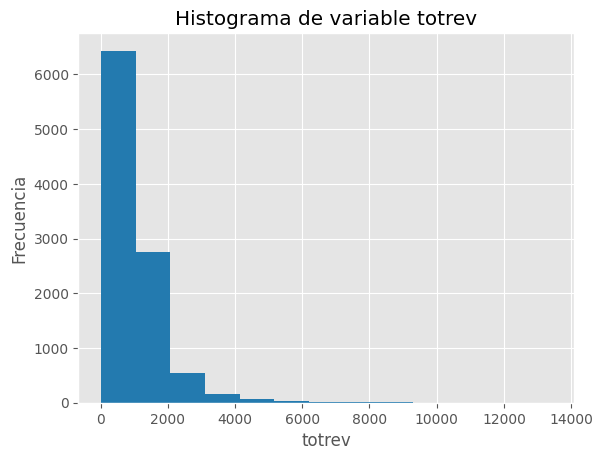

In [104]:
plt.style.use('ggplot')
plt.hist(df3["totrev"],bins=13,color="#237AAF")
plt.title('Histograma de variable totrev')
plt.xlabel("totrev");plt.ylabel("Frecuencia")
plt.show()

In [105]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### Boxplot

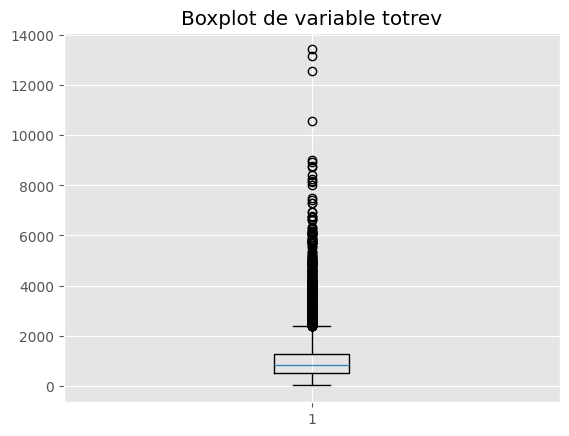

In [106]:
plt.style.use('ggplot')
plt.boxplot(df3["totrev"])
plt.title('Boxplot de variable totrev')
plt.show()

#### Gráficas a partir de `groupby`

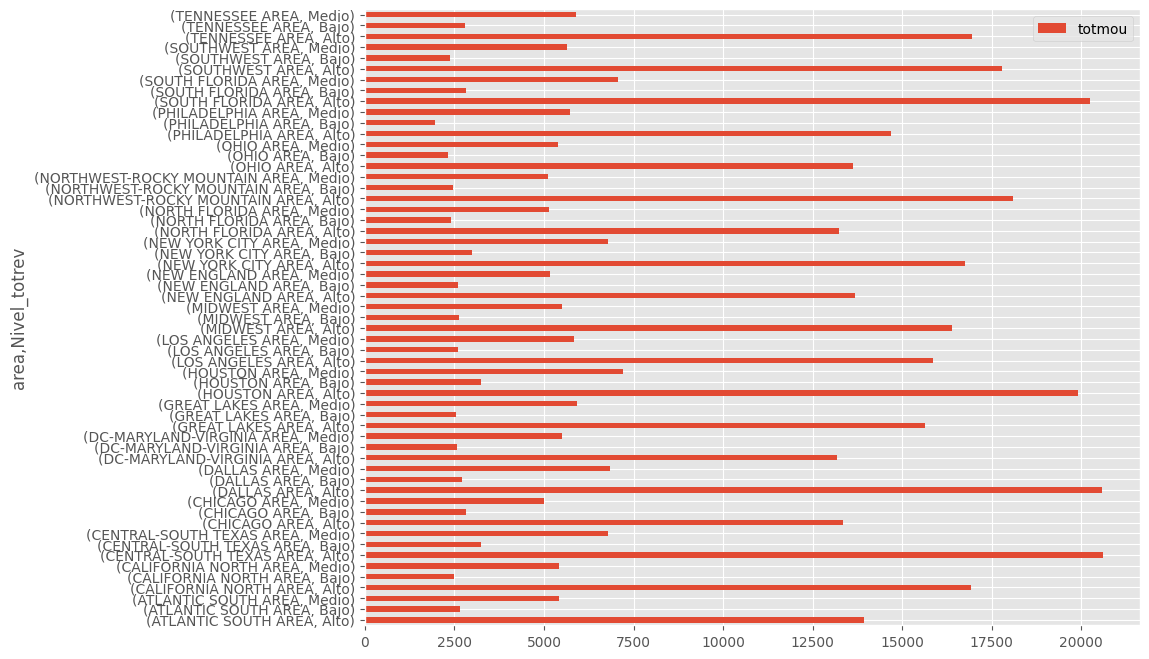

In [111]:
df4=df_con_etiquetas.groupby(['area','Nivel_totrev'])[['totmou']].mean()
df4.plot(kind='barh',figsize=(10,8))
plt.show()

#### Gráficas de `pandas`  

El modulo`.plot()` genera por defecto una gráfica de línea, existen varios gráficos para los `DataFrameGroup`

    - 'line' : Gráfica de línea
    - 'bar' :  Diagrama de barras vertical
    - 'barh' : Diagrama de barras horizontal
    - 'hist' : histograma
    - 'box' : boxplot
    - 'kde' : Kernel de densidad
    - 'area' : Gráfica de área
    - 'pie' : Diagrama de torta
    - 'scatter' : Diagrama de dispersión
    - 'hexbin' : Diagrama de hexágonos

In [112]:
df3.columns

Index(['totmou', 'totrev', 'creditcd_x', 'eqpdays', 'consumo', 'custcare_Mean',
       'new_cell', 'area', 'creditcd_y'],
      dtype='object')

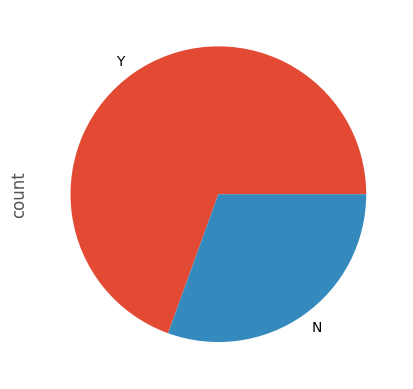

In [113]:
df3["creditcd_x"].value_counts().plot(kind="pie")
plt.show()

Revisando la relación entre las dos variables `totrev` y `totmou`

<Axes: xlabel='totrev', ylabel='totmou'>

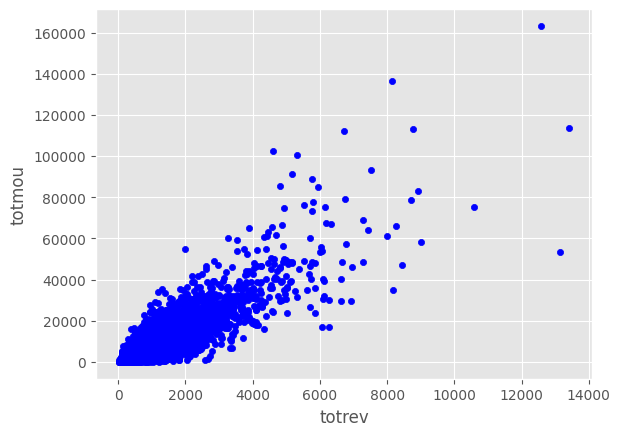

In [114]:
df3.plot(kind="scatter",x='totrev',y='totmou',c='blue')

### `Seaborn`

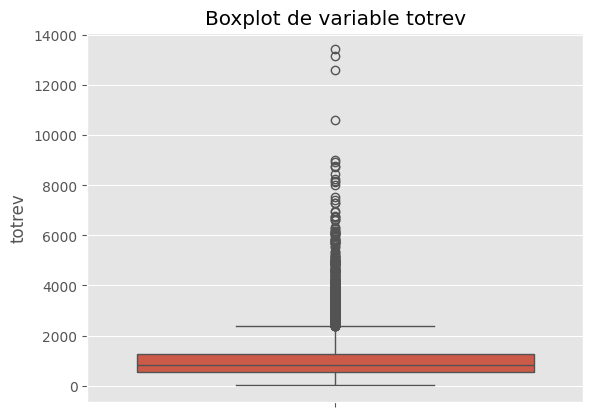

In [115]:
import seaborn as sns
sns.boxplot(df3["totrev"],orient='v')
plt.title('Boxplot de variable totrev')
plt.show()

### Gráficas de parcela 

In [116]:
df3

,totmou,totrev,creditcd_x,eqpdays,consumo,custcare_Mean,new_cell,area,creditcd_y
Customer_ID,,,,,,,,,
1082423,7269.0,906.58,Y,371,Medio,14.333333,U,NEW ENGLAND AREA,Y
1069232,13552.0,1172.25,N,83,Bajo,3.666667,U,ATLANTIC SOUTH AREA,N
1031705,4152.0,577.39,Y,675,Medio,3.000000,U,NEW YORK CITY AREA,Y
1089806,1863.0,294.26,Y,218,Alto,11.000000,U,CHICAGO AREA,Y
1076695,4155.0,433.16,N,222,Medio,0.000000,U,NORTH FLORIDA AREA,N
...,...,...,...,...,...,...,...,...,...
1027614,2570.0,484.31,Y,611,Alto,0.666667,U,CHICAGO AREA,Y
1098422,2105.0,583.36,Y,1243,Alto,0.000000,U,SOUTHWEST AREA,Y
1096497,3690.0,294.29,Y,212,Medio,0.666667,Y,NEW ENGLAND AREA,Y


<Figure size 11600x400 with 0 Axes>

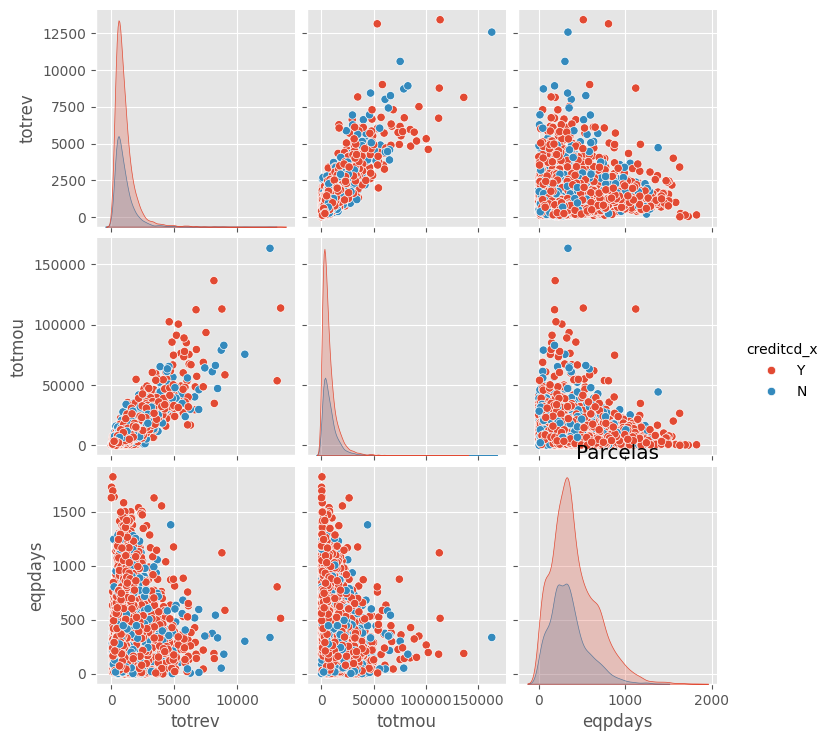

In [117]:
plt.figure(figsize=(116,4))
sns.pairplot(data=df3, hue='creditcd_x', vars=['totrev','totmou','eqpdays'])
plt.title("Parcelas")
plt.show()

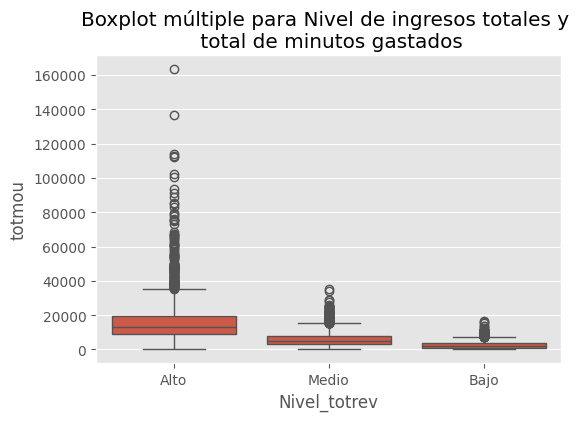

In [118]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Nivel_totrev',y='totmou',data=df_con_etiquetas)
plt.title('Boxplot múltiple para Nivel de ingresos totales y \n total de minutos gastados')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15264\901159224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="totmou", x="Nivel_totrev", kind="box",    data=df_con_etiquetas, height=4, aspect=4, palette='Set2')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15264\901159224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="totmou", x="Nivel_totrev", kind="violin", data=df_con_etiquetas, height=4, aspect=4, palette='Set2')


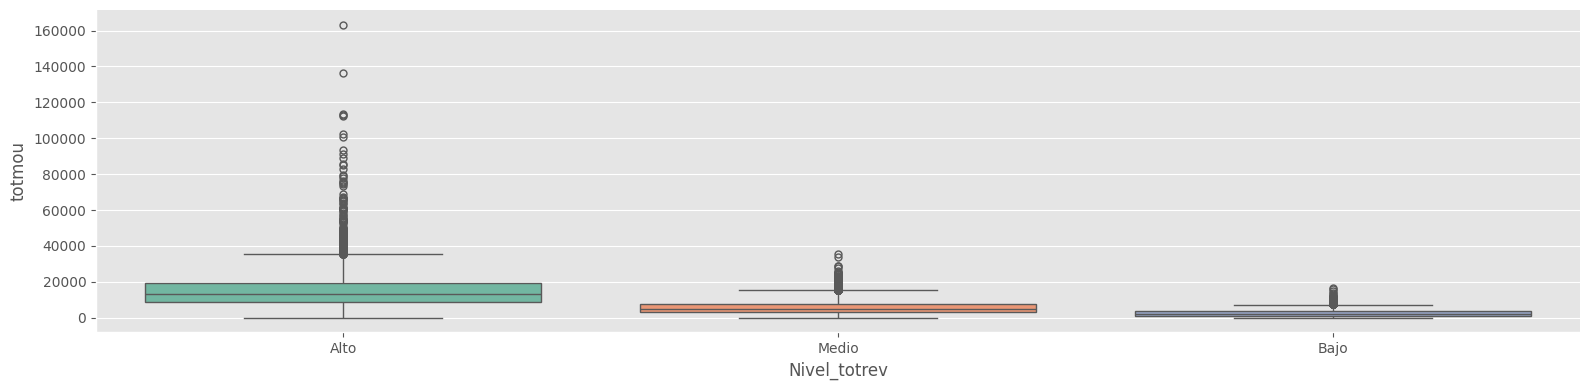

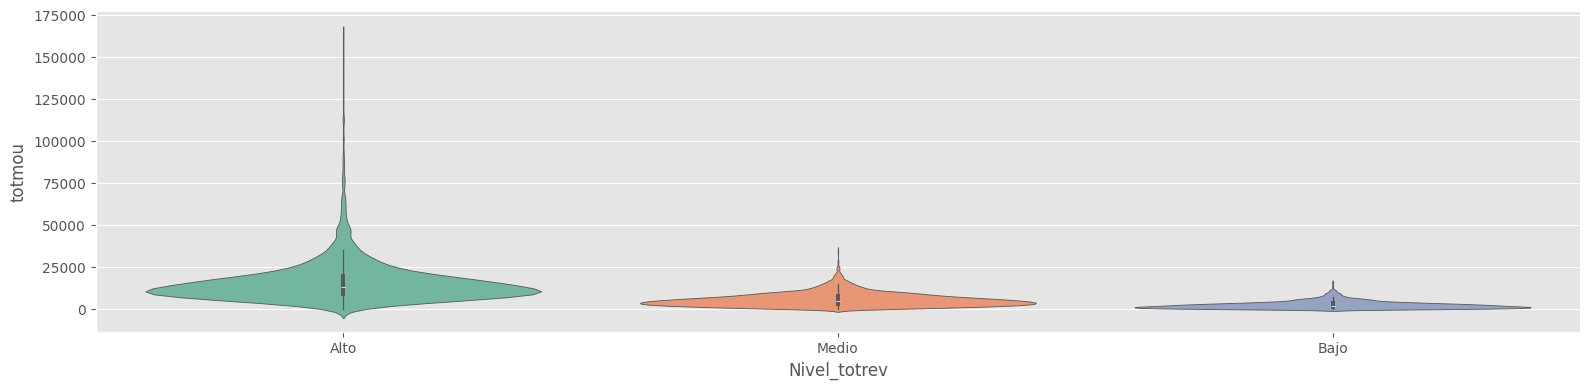

In [119]:
sns.catplot(y="totmou", x="Nivel_totrev", kind="box",    data=df_con_etiquetas, height=4, aspect=4, palette='Set2')
sns.catplot(y="totmou", x="Nivel_totrev", kind="violin", data=df_con_etiquetas, height=4, aspect=4, palette='Set2')

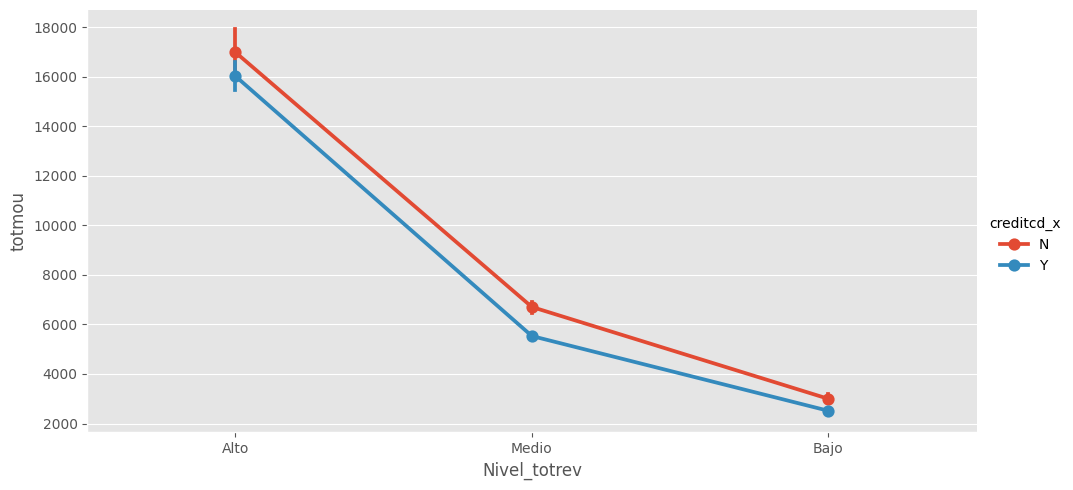

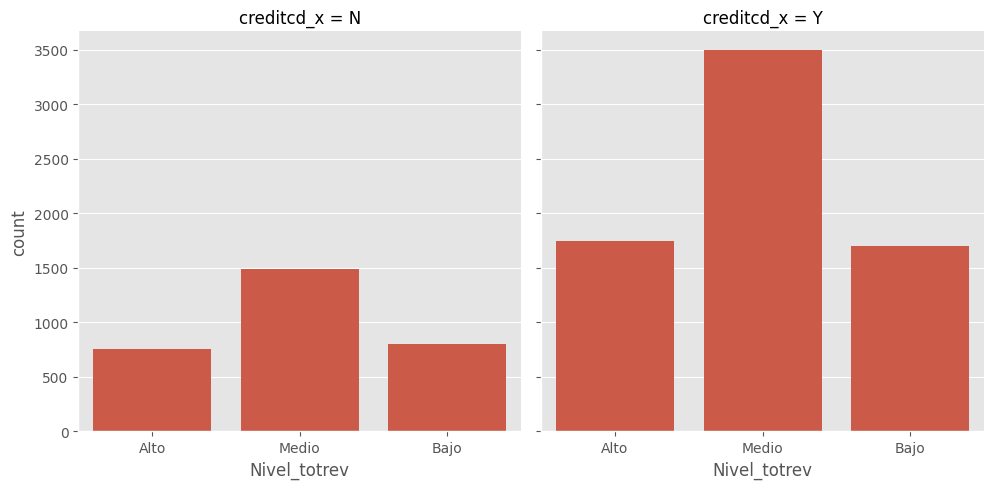

In [120]:
ax = sns.catplot(y="totmou", x="Nivel_totrev", hue='creditcd_x', kind='point',data=df_con_etiquetas, aspect=2)
ax = sns.catplot(x="Nivel_totrev", kind='count',data=df_con_etiquetas, col='creditcd_x')

### Ejercicio 5

Realice un  boxplot para la variable totmou segmentado por las variable  credict_x y Nivel_totrev

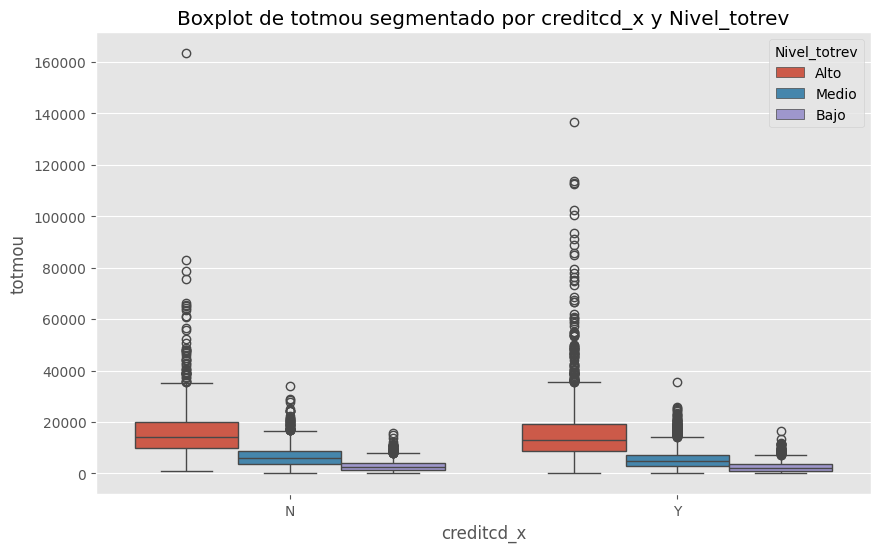

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='creditcd_x', y='totmou', hue='Nivel_totrev', data=df_con_etiquetas)
plt.title('Boxplot de totmou segmentado por creditcd_x y Nivel_totrev')
plt.show()

## Resumen


1. Leer datos desde archivos.
2. Agregar y manipular datos .
3. Analizar estadísticas de resumen y reunir información.
4. Usar matplotlib para crear gráficos para hacer análisis visual, además de otras librerías.

Para más información

> [https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)